In [279]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set_style('whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import *
import random



In [214]:
# add TPak location
df = pd.read_excel('2018-09-11 - RdsON and Vth distribution from 18 lots, die level.xlsx')

In [247]:
len(df[df['RDSON_10A_20V (estimate)'] > 0.048]['RDSON_10A_20V (estimate)'])

6

In [239]:
df_rdson = df['RDSON_10A_20V (estimate)'][df['RDSON_10A_20V (estimate)']<=0.048]
df_rdson.max()

0.047999999999999994

In [240]:
df_rdson.mean()

0.03149548192771076

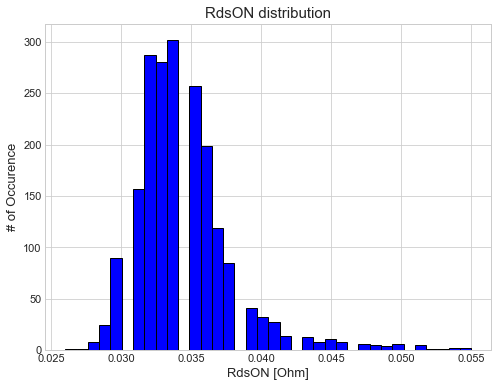

In [48]:
# plot histogram of distribution
fig= plt.figure(figsize=(8,6))
plt.hist(df_rdson, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
# sns.distplot(df_rdson, hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# Add labels

plt.rc('xtick', labelsize=11)     
plt.rc('ytick', labelsize=11)

plt.title('RdsON distribution', size = 15);
plt.xlabel('RdsON [Ohm]', size = 13);
plt.ylabel('# of Occurence', size = 13);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


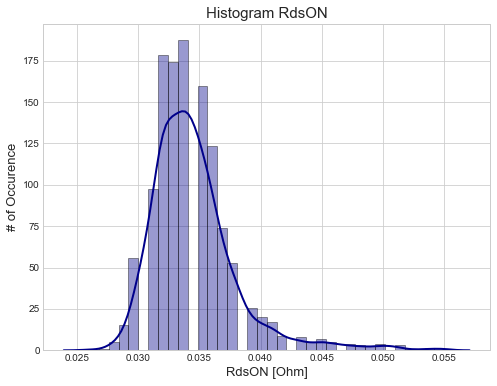

In [39]:
fig= plt.figure(figsize=(8,6));
sns.distplot(df_rdson, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title('Histogram RdsON', size = 15);
plt.xlabel('RdsON [Ohm]', size = 13);
plt.ylabel('# of Occurence', size = 13);

In [100]:
g = []
for x in range (0, 100):
    m = random.sample(list(df_rdson), 1)
    g.append(m)
    

In [101]:
df_rdson.mean()

0.03455355355355312

In [108]:
df_rdson.max()

0.055

In [334]:
temp = np.array([25, 100, 150, 200])
RdsON_typical = 1e-3*np.array([31,41,51,67]) #single die
RdsON_min = 1e-3*np.array([20,30,39,51]) 
RdsON_max = 1e-3*np.array([48,59,66,80]) 

In [335]:
poly_typical = np.polyfit(temp, RdsON_typical, 2)
poly_min = np.polyfit(temp, RdsON_min, 2)
poly_max = np.polyfit(temp, RdsON_max, 2)

In [336]:
poly_min

array([4.61012813e-07, 7.27333740e-05, 1.79350214e-02])

In [337]:
poly_typical

array([7.91214155e-07, 2.56863941e-05, 2.99853569e-02])

In [338]:
poly_max

array([5.08846858e-07, 6.39963392e-05, 4.63480781e-02])

In [348]:
r = np.array([RdsON_min[0], RdsON_typical[0], RdsON_max[0]])
t2_term = np.array([poly_min[0], poly_typical[0], poly_max[0]])
t1_term = np.array([poly_min[1], poly_typical[1], poly_max[1]])
t0_term = np.array([poly_min[2], poly_typical[2], poly_max[2]])

In [349]:
interp_t2  = interpolate.interp1d(r, t2_term)
interp_t1  = interpolate.interp1d(r, t1_term)
interp_t0  = interpolate.interp1d(r, t0_term)


Rx = 40e-3
t2x = interp_t2(Rx)
t1x = interp_t1(Rx)
t0x = interp_t0(Rx)

In [361]:
x = np.linspace(20e-3,48e-3,1e3*(48e-3-20e-3+1e-3));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


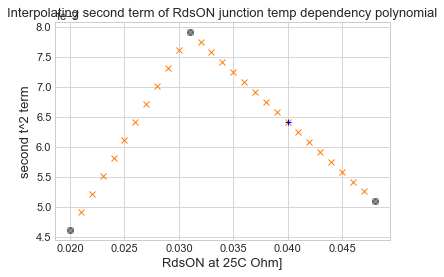

In [365]:
plt.plot(r,t2_term,'o')
plt.plot(x,interp_t2(x),'x')
plt.plot(Rx, interp_t2(Rx),'b+')
plt.title('Interpolating second term of RdsON junction temp dependency polynomial', size = 13);
plt.ylabel('second t^2 term', size = 13);
plt.xlabel('RdsON at 25C Ohm]', size = 13);

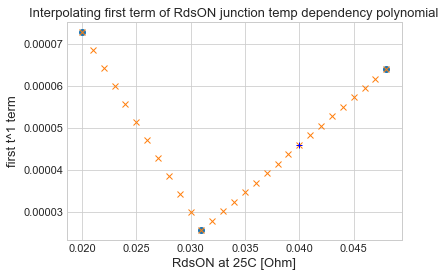

In [366]:
plt.plot(r,t1_term,'o')
plt.plot(x,interp_t1(x),'x')
plt.plot(Rx, interp_t1(Rx),'b+')
plt.title('Interpolating first term of RdsON junction temp dependency polynomial', size = 13);
plt.ylabel('first t^1 term', size = 13);
plt.xlabel('RdsON at 25C [Ohm]', size = 13);

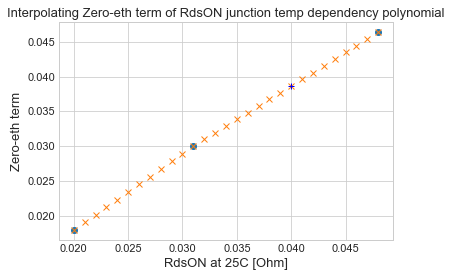

In [367]:
plt.plot(r,t0_term,'o')
plt.plot(x,interp_t0(x),'x')
plt.plot(Rx, interp_t0(Rx),'b+')
plt.title('Interpolating Zero-eth term of RdsON junction temp dependency polynomial', size = 13);
plt.ylabel('Zero-eth term', size = 13);
plt.xlabel('RdsON at 25C [Ohm]', size = 13);

In [369]:
Rx = 40e-3
polyx = np.array([interp_t2(Rx), interp_t1(Rx), interp_t0(Rx)])
t2x = interp_t2(Rx)
t1x = interp_t1(Rx)
t0x = interp_t0(Rx)

RdsON_sample = polyx[0]*temp**2 + polyx[1]*temp + polyx[2]
RdsON_sample

array([0.04019826, 0.04966204, 0.05998202, 0.07351062])

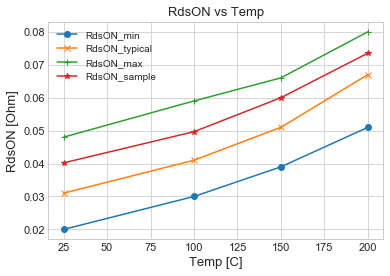

In [372]:
plt.plot(temp, RdsON_min, 'o-', label = 'RdsON_min')
plt.plot(temp, RdsON_typical, 'x-', label = 'RdsON_typical')
plt.plot(temp, RdsON_max, '+-', label = 'RdsON_max')
plt.plot(temp, RdsON_sample, '*-', label = 'RdsON_sample')
plt.title('RdsON vs Temp', size = 13);
plt.ylabel('RdsON [Ohm]', size = 13);
plt.xlabel('Temp [C]', size = 13);
plt.legend();